<a href="https://colab.research.google.com/github/Mikhailo88/ChiselniMetody/blob/main/%D0%9B%D0%B0%D0%B1_2_%D0%9E%D0%BB%D1%8C%D1%85%D0%BE%D0%B2%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Відокремлення коренів




In [18]:
import numpy as np
import numdifftools as nd
def f(x):
    return 3*x**4 - 4*x**3 + x**2 - 2*x - 3


def find_segments(): #відокремлюємо корені
    search_range = np.arange(-10, 10, 1)

    a = None
    prev_x = None
    curr_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        curr_x = f(x)
        if prev_x != None and prev_x * curr_x < 0:
            segments.append((a, x))
        a = x
        prev_x = curr_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')


Found segment:  [-1, 0]
Found segment:  [1, 2]


2.Побудова графіка

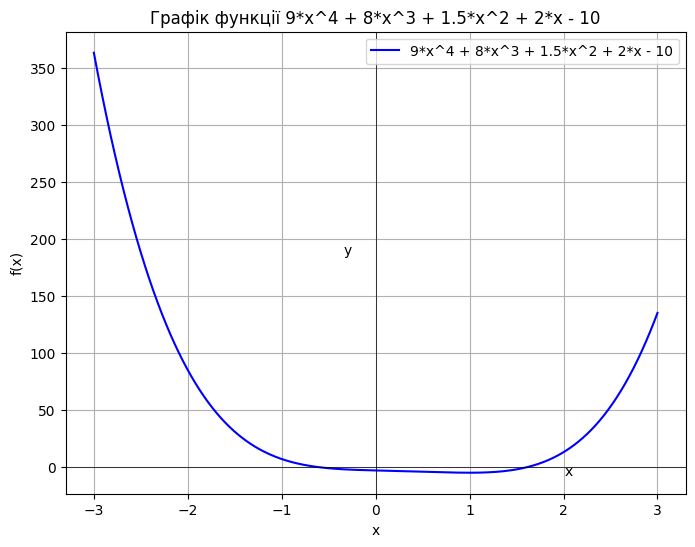

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return 3*x**4 - 4*x**3 + x**2 - 2*x - 3

x = np.linspace(-3, 3, 400)
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='9*x^4 + 8*x^3 + 1.5*x^2 + 2*x - 10', color='blue')
plt.title('Графік функції 9*x^4 + 8*x^3 + 1.5*x^2 + 2*x - 10')
plt.xlabel('x')
plt.ylabel('f(x)')
# Додавання осей
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 190, 'y', ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()

3.Метод половинного ділення і метод хорд

In [37]:
import numpy as np

def f(x):
    return 3*x**4 - 4*x**3 + x**2 - 2*x - 3

def rec(a, b, eps):  # Метод половинного деления
    while abs(a - b) > eps:
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
    x = (a + b) / 2
    print('x= ', round(x, 5), '  -   Half division method')

def hord(a, b, eps):  # Метод хорд

    xi_1 = a - f(a) * (b - a) / (f(b) - f(a))
    while abs(f(xi_1)) > eps:
        if f(a) * f(xi_1) < 0:
            b = xi_1
        else:
            a = xi_1
        xi_1 = a - f(a) * (b - a) / (f(b) - f(a))
    print('x= ', round(xi_1, 5), '  -   Chord method')

if __name__ == "__main__":
    a1, b1 = -1, 0
    a2, b2 = 1, 2
    eps = 0.001
    print("Розв'язки на відрізку [-1,0]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\nРозв'язки на відрізку [1,2]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)


Розв'язки на відрізку [-1,0]
x=  -0.61768   -   Half division method
x=  -0.61797   -   Chord method

Розв'язки на відрізку [1,2]
x=  1.61768   -   Half division method
x=  1.61799   -   Chord method
